# DB에서 매트릭을 읽어서 그래프 그리기

<p>won@aimmo.co.kr(swhors@naver.com)</p>

In [2]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


In [7]:
def restart_kernel():
    # Restart the kernet after libraries are loaded.
    import IPython
    from datetime import datetime
    print(f'restart kernel... {datetime.now()}')
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

restart_kernel()

restart kernel... 2025-05-27 16:12:39.290787


In [1]:
import os
import sys
from datetime import datetime
cwd = os.getcwd()
sys.path.append(cwd)
print(sys.path)

print(f'load_library step#1 {datetime.now()}')

['/home/swhors/jupyter-workspace/LSTM/$PWD', '/home/swhors/jupyter-workspace/finance', '/home/swhors/jupyter-workspace/finance/venv/lib/python3.11/site-paches', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/home/swhors/jupyter-workspace/finance/venv/lib/python3.11/site-packages', '/home/swhors/jupyter-workspace/LSTM']
load_library step#1 2025-05-27 16:12:42.794782


In [2]:
from datetime import datetime
from lib.metrics_loader import load_data_by_version
from lib.graph_util import draw_data_graph
from lib.graph_util import draw_data_graph_v2
from lib.graph_util import load_image
from lib.graph_util import draw_graph_with_metric
from lib.graph_util import load_all_image
print(f'load_library step#2 {datetime.now()}')

load_library step#2 2025-05-27 16:12:46.023055


In [3]:
active_version = 0
with open('active.version', 'r') as fd:
    line = fd.read()
    active_version = int(line)
print(f'active_version={active_version}')
print(f'open active version {datetime.now()}')

active_version=36
open active version 2025-05-27 16:07:02.073344


In [4]:
!echo $PYTHONPATH

$PWD:/home/swhors/jupyter-workspace/finance:/home/swhors/jupyter-workspace/finance/venv/lib/python3.11/site-paches


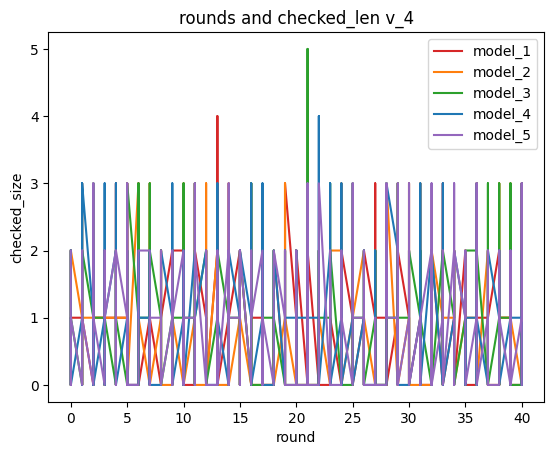

In [5]:
# active_version을 그래프로 그림
only_active=True
if only_active:
    draw_graph_with_metric(version=active_version, is_save=True)

In [25]:
# 이전 데이터 포함 모든 데이터를 버젼별로 그래프로 그림
draw_all=False
print(f'draw all metrics {datetime.now()}')
if draw_all:
    for ver in range(1, active_version + 1):
        draw_graph_with_metric(version=ver, is_save=True)

draw all metrics 2025-05-23 17:19:04.317061


In [9]:
# load only active_image
this_load_active=True
if this_load_active:
    draw_data_graph(title="model_id and checked", x_data=model_ids, y_data=checked_size, x_label="model_id", y_label="checked_size")

load_all_image 2025-05-27 16:03:57.361082
0 : v_0004.png


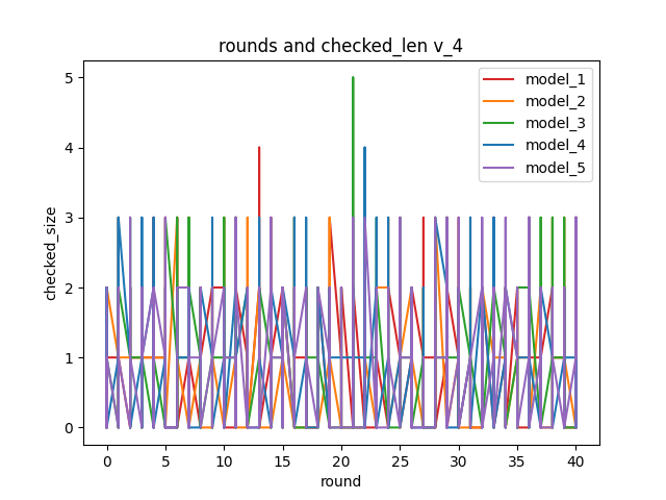

In [5]:
# load_all_image
draw_this_all=True
if draw_this_all:
    print(f'load_all_image {datetime.now()}')
    base_height = 500
    base_path = cwd
    load_all_image(base_path=base_path, base_height=base_height, verbose=False)

In [54]:
ts = datetime.now().timestamp()

In [55]:
print(ts)
ts = ts / 1000000000
print(ts)

1747919482.449404
1.747919482449404


In [46]:
from lib.db_operate import select_metric, conn_db, close_db
from datetime import datetime
#def select_metric(conn, version=-1, model_id=-1, limit=0, verbose=False):
conn = conn_db("./db/metrics.db")
model_ids = [1, 2, 3, 4, 5, 6]
metrics_col = []
cnt = 1
test_id = 'P4_4_1'
for id in model_ids:
    metric_dict = {'id': id, 'metric': {}}
    print(f'read_db.0_{cnt} (model_id={id})')
    cnt += 1
    metrics = select_metric(conn=conn, test_id=test_id, model_id=id, verbose=False)
    for metric in metrics:
        test_id = metric[1]
        version = metric[2]
        round = metric[3]
        matched_len = metric[9]
        if matched_len >= 3:
            if round not in metric_dict['metric']:
                metric_dict['metric'][round] = [version]
            else:
                if version not in metric_dict['metric'][round]:
                    metric_dict['metric'][round].append(version)
    metrics_col.append(metric_dict)
close_db(conn)
print(f'read_db.10 complete (model_id={id})')

read_db.0_1 (model_id=1)
read_db.0_2 (model_id=2)
read_db.0_3 (model_id=3)
read_db.0_4 (model_id=4)
read_db.0_5 (model_id=5)
read_db.0_6 (model_id=6)
read_db.10 complete (model_id=6)


In [47]:
op_this=False
if op_this:
    for metrics in metrics_col:
        id = metrics['id']
        keys = list(metrics['metric'].keys())
        values = list(metrics['metric'].values())

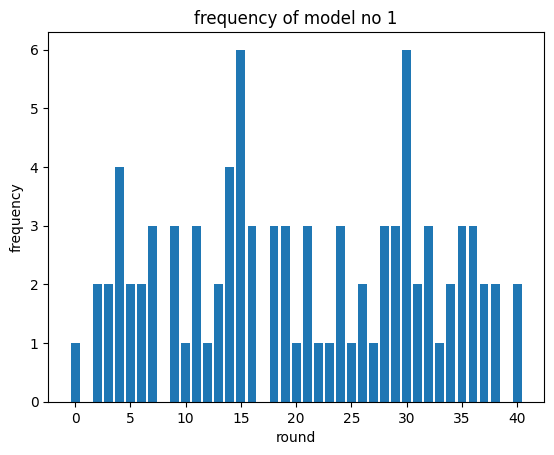

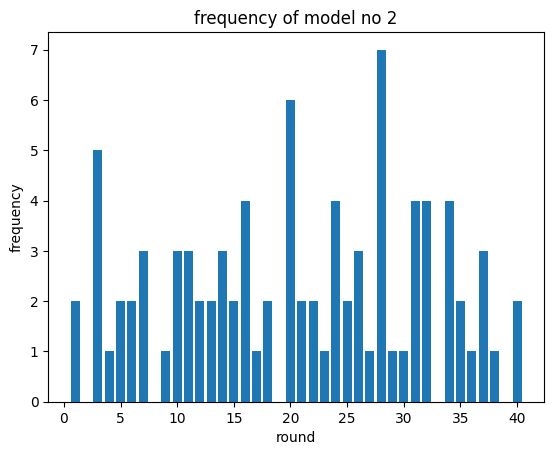

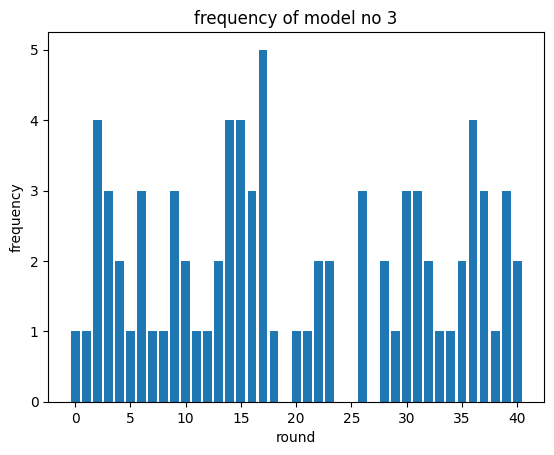

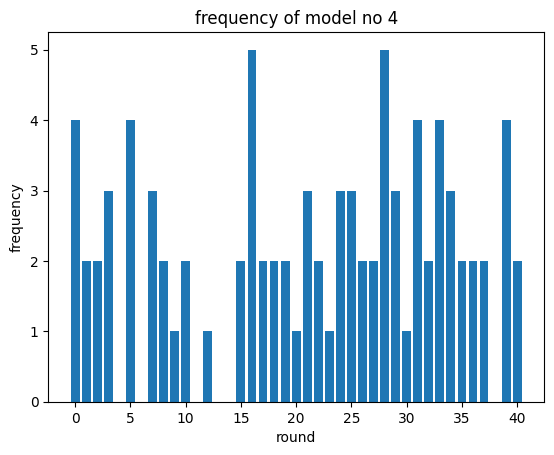

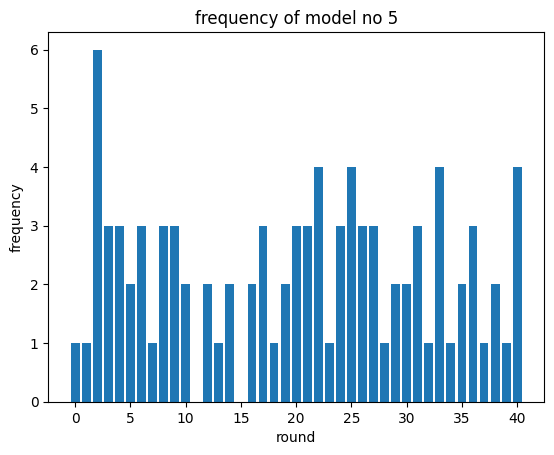

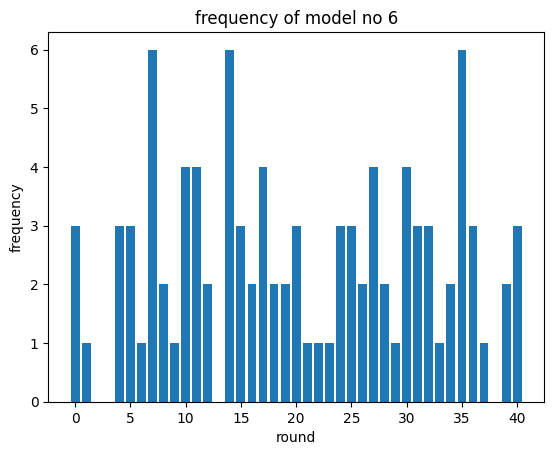

In [48]:
from lib.graph_util import draw_data_graph
for metrics in metrics_col:
    model_id = metrics['id']
    keys = list(metrics['metric'].keys())
    values = list(metrics['metric'].values())
    values_len = [len(l) for l in values]
    draw_data_graph(title=f"frequency of model no {model_id}",
                    x_data=keys,
                    y_data=values_len,
                    x_label="round",
                    y_label="frequency")